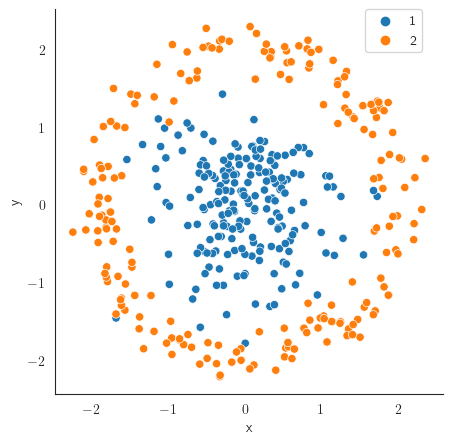

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("white")

# add latex rendering
plt.rcParams['text.usetex'] = True

# generate data
# class 1 -- X, Y ~ N(1, 1)
n1 = 200
mu1 = np.array([0, 0])
sigma1 = np.array([[0.3, 0], [0, 0.3]])
X1 = np.random.multivariate_normal(mu1, sigma1, n1)

# class 2 -- circular data with radius 2 and noise
n2 = 200
r2 = 2
theta2 = np.random.uniform(0, 2 * np.pi, n2)
X2 = np.array([r2 * np.cos(theta2), r2 * np.sin(theta2)]).T
X2 += np.random.normal(0, 0.2, (n2, 2))

df_plot = pd.DataFrame(np.concatenate([X1, X2], axis=0), columns=["x", "y"])
df_plot["Class"] = ["1"] * n1 + ["2"] * n2

# plot data
plt.figure(figsize=(5, 5))
sns.scatterplot(x="x", y="y", hue="Class", data=df_plot)
sns.despine()

# move legend
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)

# save figure
plt.savefig("output/4_data.svg", bbox_inches="tight")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


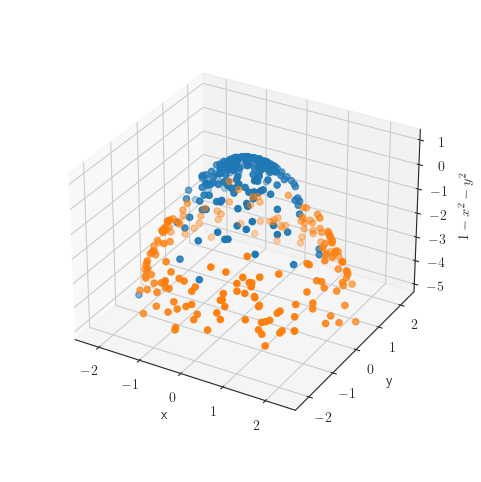

In [110]:
# Adjusting the transformation for Class 1 to create a concave "bulge"
X1_z = 1 - np.linalg.norm(X1, axis=1)**2
X1_3d = np.column_stack((X1, X1_z))

X2_z = 1 - np.linalg.norm(X2, axis=1)**2
X2_3d = np.column_stack((X2, X2_z))

# Lowering the separating plane to z = -0.25 and adjusting plot settings
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

# Plotting the separating plane at z = -0.25 without the inner grid
xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
zz = np.full(xx.shape, -0.25)
#plane = ax.plot_surface(xx, yy, zz, alpha=0.2, color='green', zorder=1, edgecolor='none')

# Plotting the transformed data points with circle markers
# Class 1

color_1 = sns.color_palette()[0]
color_2 = sns.color_palette()[1]
points1 = ax.scatter(X1_3d[:, 0], X1_3d[:, 1], X1_3d[:, 2], c=color_1, marker='o', label='Class 1', zorder=2)
# Class 2
points2 = ax.scatter(X2_3d[:, 0], X2_3d[:, 1], X2_3d[:, 2], c=color_2, marker='o', label='Class 2', zorder=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$1 - x^2 - y^2$')
ax.set_box_aspect(aspect=None, zoom=0.85)


# save figure
plt.savefig("output/4_data_3d.svg", bbox_inches="tight")
plt.show()

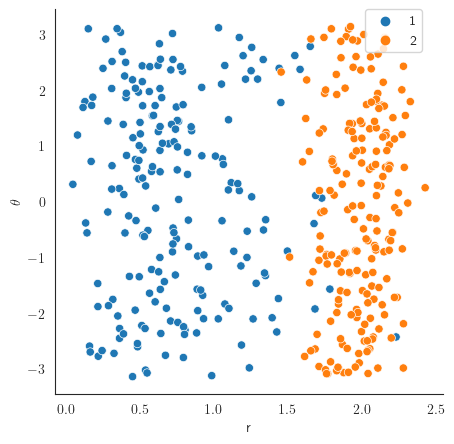

In [58]:
# polar transform the data
X1_polar = np.array([np.sqrt(X1[:, 0] ** 2 + X1[:, 1] ** 2), np.arctan2(X1[:, 1], X1[:, 0])]).T
X2_polar = np.array([np.sqrt(X2[:, 0] ** 2 + X2[:, 1] ** 2), np.arctan2(X2[:, 1], X2[:, 0])]).T

# formula for above:
# r = sqrt(x^2 + y^2)
# theta = arctan(y/x)

df_plot_pol = pd.DataFrame(np.concatenate([X1_polar, X2_polar], axis=0), columns=["r", "theta"])
df_plot_pol["Class"] = ["1"] * n1 + ["2"] * n2

# plot data
plt.figure(figsize=(5, 5))
sns.scatterplot(x="r", y="theta", hue="Class", data=df_plot_pol)
sns.despine()

# move legend
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)

plt.xlabel("r")
plt.ylabel(r'$\theta$')

# save figure
plt.savefig("output/4_data_polar.svg", bbox_inches="tight")